# Multiple Linear Regression
### Models the mean of a response variable as a function of several explanatory variables.


## Case Study: Effects of Light on Meadowfoam Flowering—A Randomized Experiment 

Researchers reported the results from one study in a series designed to find out how to elevate meadowfoam production to a profitable crop. In a controlled growth chamber, they focused on the effects of two light-related factors: light intensity, at the six levels of 150, 300, 450, 600, 750, and 900mol/m2/sec; and the timing of light treatment, either at photoperiodic floral induction (PFI)— was increased from 8 to 16 hours per day to induce flowering—or 24 days before PFI. 



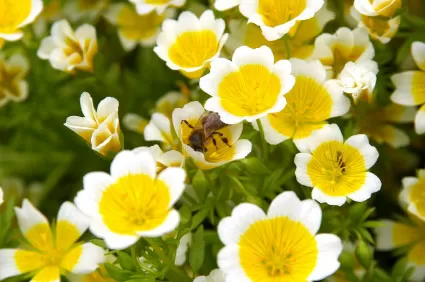


https://www.outsidepride.com/seed/ground-cover-seed/limnanthes-douglasii.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.formula.api as smf
sns.set_style('whitegrid')

In [2]:
path = 'sleuth3csv/case0901.csv'
df = pd.read_csv(path)
df.head()

,Flowers,Time,Intensity
0,62.3,1,150
1,77.4,1,150
2,55.3,1,300
3,54.2,1,300
4,49.6,1,450


In [ ]:
df.Time.unique()

array([1, 2])

In [3]:
df.loc[df.Time == 2, 'Treatment'] = 'Early'  
df.loc[df.Time == 1, 'Treatment'] = 'Late'  

df.head()

,Flowers,Time,Intensity,Treatment
0,62.3,1,150,Late
1,77.4,1,150,Late
2,55.3,1,300,Late
3,54.2,1,300,Late
4,49.6,1,450,Late


Text(0.5, 0, 'Light Intensity ($\\mu\\mathrm{mol/m^2/sec}$)')

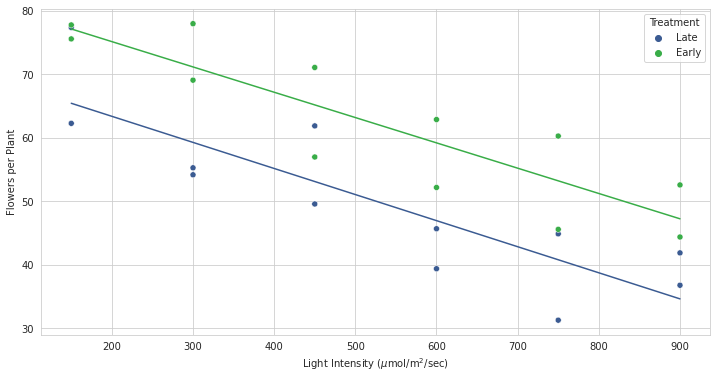

In [ ]:

## this model fitting is only for visualization purposes only. A more general/clearer method will be discussed.
colors = ["denim blue", "medium green"]
palette = sns.xkcd_palette(colors)

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='Intensity', y='Flowers', hue='Treatment', palette=palette, data=df, ax=ax)

for (time, grp), color in zip(df.groupby('Time'), palette):
    #print(grp)
    model = smf.ols('Flowers ~ Intensity', data=grp)
    results = model.fit()
    #print(results.summary())
    ax.plot(grp['Intensity'], results.fittedvalues, color=color)
    
ax.set_ylabel('Flowers per Plant')
ax.set_xlabel('Light Intensity ($\mu\mathrm{mol/m^2/sec}$)')

## **Examples of Multiple Linear Regressions**

\begin{equation}
\begin{split}
\mu\{Y|X_1,X_2\} & =\beta_0+\beta_1X_1+\beta_2 X_2\\
\mu\{Y|X_1\} & =\beta_0+\beta_1X_1+\beta_2 X_1^2\\
\mu\{Y|X_1, X_2\} & =\beta_0+\beta_1X_1+\beta_2 X_2+\beta_3 X_1X_2\\
\mu\{Y|X_1, X_2\} & =\beta_0+\beta_1log(X_1)+\beta_2 log(X_2)
\end{split}
\end{equation}


### The ideal regression model includes an assumption of constant variation.

$$Var(Y|X_1,X_2,..,X_n)=\sigma=\text{Constant (same for all values of} X_1,..X_n \text{)}$$

## Regression $$\mu\{flowers|light, time\}=\beta_0+\beta_1 light + \beta_2 time$$

This equation represents a plane in the coordinate system $\mu$ , $light$ and $time$.

## **Effects of explanatory varaibles.**
The effect of an explanatory variable is the change in the mean response that is associated with a one-unit increase in that variable while holding all other explanatory variables fixed.
\begin{equation}
\begin{split}
light\_effect & = \mu\{flowers|light+1, time\} - \mu\{flowers|light, time\}\\
& = [\beta_0+\beta_1 (light+1) + \beta_2 time]-[\beta_0+\beta_1 light + \beta_2 time]\\
& = \beta_1
\end{split}
\end{equation}

The coefficient of one explanatory variable measures the effect of that variable at fixed values of the other.

## **Meadowfoam Flowering case study example**

In [ ]:
model = smf.ols("Flowers ~ Intensity + Treatment", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Flowers   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     41.78
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.79e-08
Time:                        00:20:11   Log-Likelihood:                -77.157
No. Observations:                  24   AIC:                             160.3
Df Residuals:                      21   BIC:                             163.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            83.4642      3.27

In [ ]:
shapiro(results.resid)

ShapiroResult(statistic=0.9555885791778564, pvalue=0.35633233189582825)

## Model: $$\hat{\mu}\{flowers|light, late\} = 83.46 - 0.04 light -12.16 late$$

#### Increasing light intensity decreased the mean number of flowers per plant by an estimated 4.0 flowers per plant per 100mol/m2/sec (95% confidence interval from 3.0 to 5.1).

#### Beginning the light treatments 24 days prior to PFI increased the mean numbers of flowers by an estimated 12.2 flowers per plant (95% confidence interval from 6.7 to 17.6).



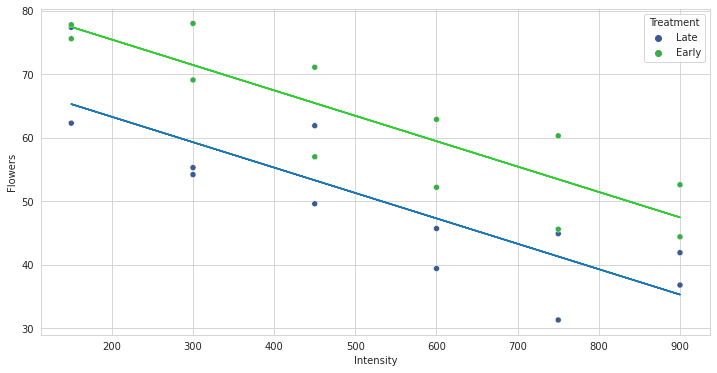

In [ ]:
colors = ["denim blue", "medium green"]
palette = sns.xkcd_palette(colors)


fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='Intensity', y='Flowers', hue='Treatment', palette=palette, data=df, ax=ax)

y_late = 83.46-0.04*np.array(df['Intensity'])-12.16

y_early = 83.46-0.04*np.array(df['Intensity'])

ax.plot(df['Intensity'], y_late)

ax.plot(df['Intensity'], y_early, color = 'limegreen')

plt.show()


## **Indicator (dummmy) variables**

Multiple linear regression model incorporates indicator variables to represent  two/more levels of a categorical explanatory variable (ex: Onset of Treatment variable). 

Indicator variable approach also provides the same result as in the previous model.

In [4]:
df = pd.get_dummies(df, columns=['Treatment'])
df.head()

,Flowers,Time,Intensity,Treatment_Early,Treatment_Late
0,62.3,1,150,0,1
1,77.4,1,150,0,1
2,55.3,1,300,0,1
3,54.2,1,300,0,1
4,49.6,1,450,0,1


In [ ]:
model = smf.ols("Flowers ~ Intensity + Treatment_Late", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Flowers   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     41.78
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.79e-08
Time:                        00:17:13   Log-Likelihood:                -77.157
No. Observations:                  24   AIC:                             160.3
Df Residuals:                      21   BIC:                             163.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         83.4642      3.274     25.

## **Product term for Interaction**

Two explanatory variables are said to interact if the effect that one of them has on the mean response depends on the value of the other.

Ex: Does the effect of light intensity on mean number of flowers depend on the timing of the light regime (early or late)?

$$ \mu\{flowers|light, late\} = \beta_0 + \beta_1 light + \beta_2 late + \beta_3 (light*late)$$

This also can be written as

$$ \mu\{flowers|light, late\} = \beta_0 + \beta_2 late + (\beta_1 + \beta_3 late) light$$

In this model: Light intensity effect = $\beta_1+\beta_3 late$ (i.e. light effect depends on treatment)
            
Treatment (late) effect := $\beta_2 + \beta_3 light$ (i.e. treatment effect depends on light intensity)

It is often difficult to interpret individual coeffcients in an interaction model. If it is only necessary to test whether interaction is present, no lengthy interpretation is needed.


## **Do individual terms come with Product terms or not?**

Except in special circumstances, a model including a product term for interaction between two explanatory variables **should** also include terms with each of the explanatory variables individually, even though their coefficients may not be significantly different from zero. 


Following this rule avoids the logical inconsistency of saying that the effect of X1 depends on the level of X2 but that there is no effect of X1.

In [7]:
df['light_late'] = df['Intensity']*df['Treatment_Late']
df.head()

,Flowers,Time,Intensity,Treatment_Early,Treatment_Late,light_late
0,62.3,1,150,0,1,150
1,77.4,1,150,0,1,150
2,55.3,1,300,0,1,300
3,54.2,1,300,0,1,300
4,49.6,1,450,0,1,450


In [8]:
model = smf.ols("Flowers ~ Intensity + Treatment_Late + light_late", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Flowers   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     26.55
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.55e-07
Time:                        14:52:08   Log-Likelihood:                -77.149
No. Observations:                  24   AIC:                             162.3
Df Residuals:                      20   BIC:                             167.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         83.1467      4.343     19.

We can include an interaction term directly via OLS method without creating a new column. 

```
smf.ols("Flowers ~ Intensity + Treatment_Late + Intensity*Treatment_Late", data = df)
```



In [24]:
model = smf.ols("Flowers ~ Intensity + Treatment_Late + Intensity*Treatment_Late", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Flowers   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     26.55
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.55e-07
Time:                        17:27:07   Log-Likelihood:                -77.149
No. Observations:                  24   AIC:                             162.3
Df Residuals:                      20   BIC:                             167.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

###   No evidence that the effect of light intensity depends on the timing of its initiation (two-sided p-value = 0.91, from a t-test for interaction, 20 degrees of freedom).


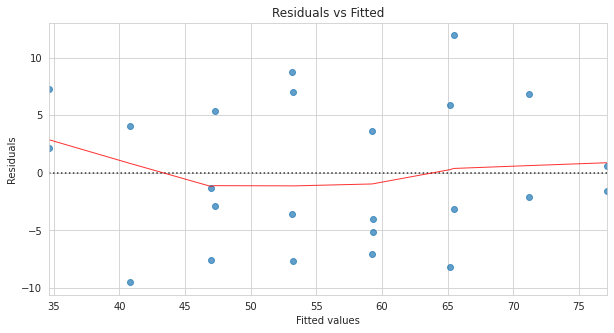

In [22]:
plt.figure(figsize=(10,5))

# fitted values (predicted values)
model_fitted_y = results.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Flowers', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.7}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [11]:
shapiro(results.resid)

ShapiroResult(statistic=0.9534139633178711, pvalue=0.32069694995880127)

## Case Study: Why Do Some Mammals Have Large Brains for Their Size?—An Observational Study

### Determine exactly what characteritics are associated with brain size (after removing body size variable).

# **Interpretation Depends on What Other X’s Are Included**

$$ \mu\{brain, gestation\} = \beta_0+\beta_1 gestation $$

$$ \mu\{brain, gestation\} = \beta_0+\beta_1 gestation + \beta_2 body $$

First equation: $\beta_1$:= rate of change in mean brain weight with changes in gestation length in the **population of all mammal species**.

Second equation: $\beta_1$:= rate of change in mean brain weight with changes in gestation length **within subpopulations of fixed body size**.

In [9]:
path = 'sleuth3csv/case0902.csv'
df = pd.read_csv(path)
df.head()

,Species,Brain,Body,Gestation,Litter
0,Aardvark,9.6,2.20,31,5.0
1,Acouchis,9.9,0.78,98,1.2
2,African elephant,4480.0,2800.00,655,1.0
3,Agoutis,20.3,2.80,104,1.3
4,Axis deer,219.0,89.00,218,1.0


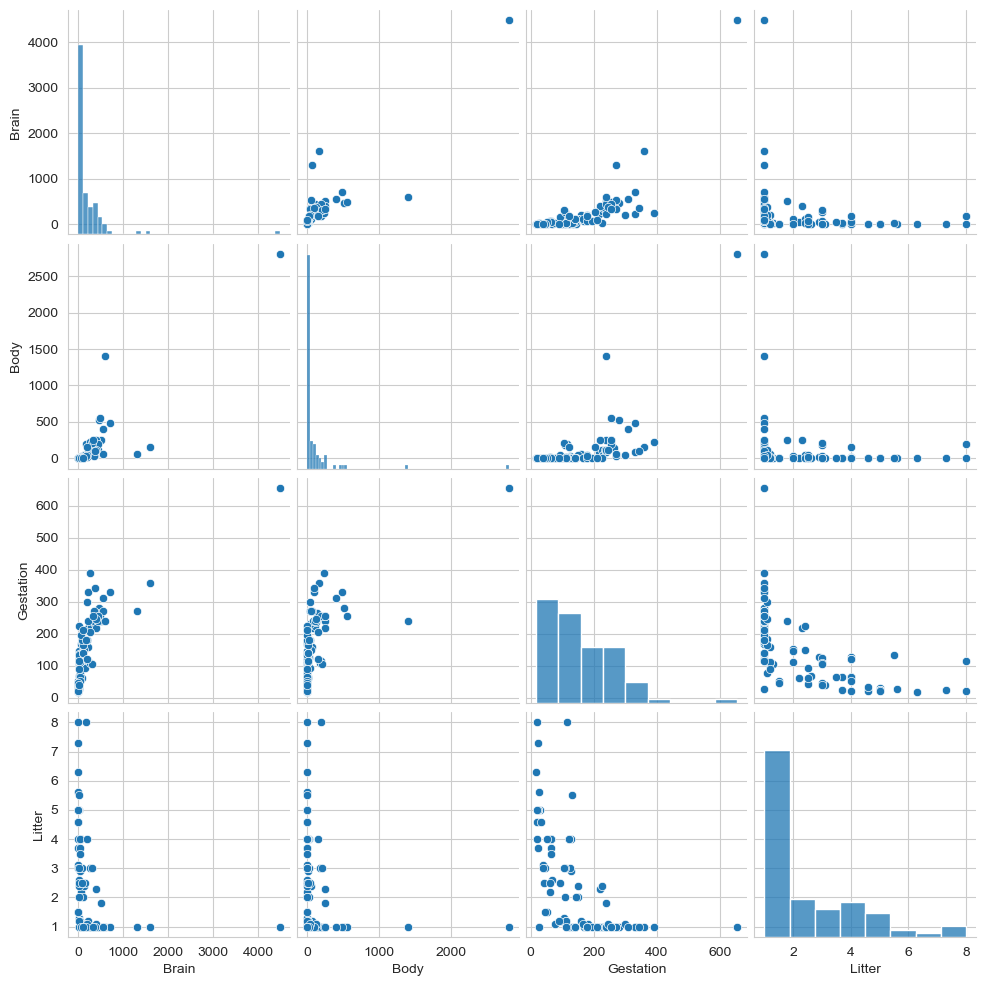

In [10]:
sns.pairplot(df)
plt.show()

The scatterplot of brain weight versus body weight is not very helpful since most of the data points are clustered on top of each other in the bottom left-hand corner. So we obtain another scatter plot with log transformed data.

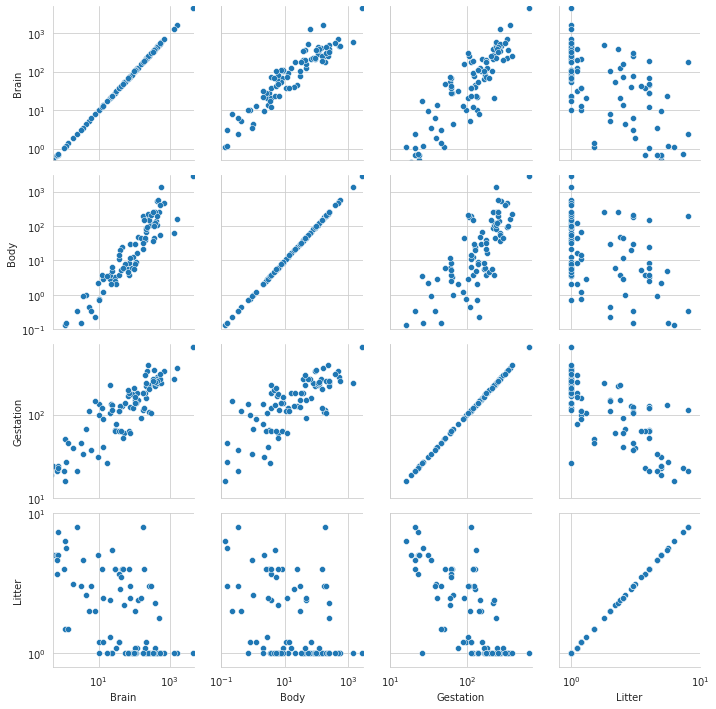

In [33]:
xylim_map = {0: [0.5, 5000], 1: [0.1, 3000], 2: [10, 700], 3: [0.8, 10]}
g = sns.PairGrid(df)
g.map(sns.scatterplot)
for ridx, row in enumerate(g.axes):
    ymin, ymax = xylim_map[ridx]
    for cidx, ax in enumerate(row):
        xmin, xmax = xylim_map[cidx]
        ax.set(xscale='log', yscale='log')
        ax.set_ylim(bottom=ymin, top=ymax)
        ax.set_xlim(left=xmin, right=xmax)

In [11]:
def bins(value):
    if value <=2:
        return "0-2 kg"
    if 2 < value <= 9:
        return "2-9 kg"
    if 9 < value <= 100:
        return "9-100 kg"
    else:
        return "100-10000 kg"


df["body_class"] = df['Body'].apply(bins)

df.head()


,Species,Brain,Body,Gestation,Litter,body_class
0,Aardvark,9.6,2.20,31,5.0,2-9 kg
1,Acouchis,9.9,0.78,98,1.2,0-2 kg
2,African elephant,4480.0,2800.00,655,1.0,100-10000 kg
3,Agoutis,20.3,2.80,104,1.3,2-9 kg
4,Axis deer,219.0,89.00,218,1.0,9-100 kg


In [12]:
df["log_brain"] = np.log(df['Brain'])
df["log_gestation"] = np.log(df['Gestation'])

In [6]:
custom_dict = {"0-2 kg": 0, "2-9 kg": 1, "9-100 kg": 2, "100-10000 kg": 3 } 

df.sort_values(by = "body_class", inplace=True, ascending=False, key=lambda x: x.map(custom_dict))

In [17]:
import plotly.express as px
#df = px.data.tips()
fig = px.scatter(df, x="log_gestation", y="log_brain", facet_row="body_class", width=800, height=800)
fig.update_yaxes(matches=None)
fig.show()

This Trellis Graph suggests a positive relationship exists between brain weight and gestation length even accounting for different body weights. 

Furthermore, the slope in this relationship appears to be the same in the different panels of body weight; that is, there is **no evidence of an interactive effect of gestation and body weight on brain weight.**


In [59]:
model = smf.ols("np.log(Brain) ~ np.log(Body) + np.log(Gestation) + np.log(Litter)", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Brain)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     631.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.14e-61
Time:                        20:44:54   Log-Likelihood:                -62.659
No. Observations:                  96   AIC:                             133.3
Df Residuals:                      92   BIC:                             143.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8548      0.66

We have convincing that the brain weight is associcated with either gestation period or litter size, even after accounting for the body weight (p-value<0.0001; extra sum of squares F-test). 


The litter size is associated with brain weight after accounting for body weight and gestation (two-sided p-value = 0.009).


The gestation period is associated with brain weight after accounting for body weight and litter size (two-sided p-value = 0.004).




